In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')

/var/folders/4f/qyps37zn1kj0l6kkmb7f_zkw0000gn/T/ipykernel_45513/1935194065.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


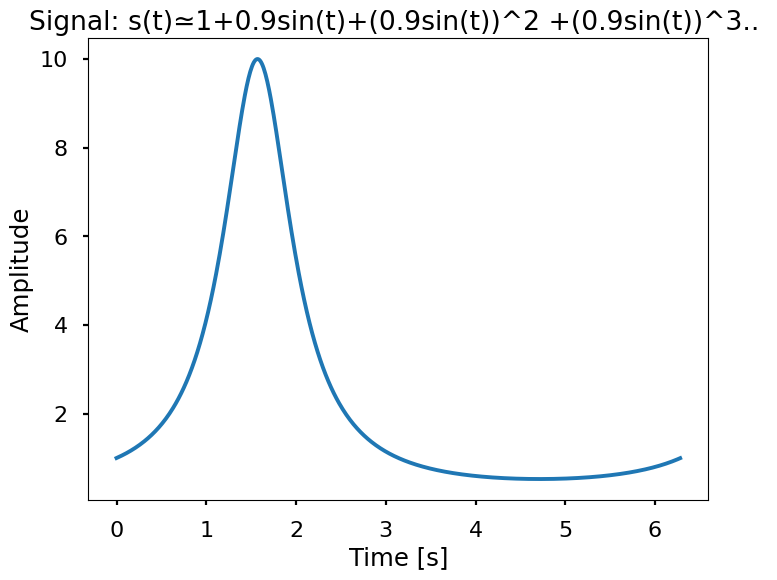

In [2]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
# Nyquist Frequency
ni_freq = sr/2


# period equal to 2pi because thats the frequency of the sin function modeled
period = 2*np.pi

# create the timeseries of the signal 
t = np.arange(0,period,ts)

# generate signal as x
signal = np.ones(len(t))
overtones = 100
for power in range(1, overtones+1):
    signal += (0.9 * np.sin(t))**power

plt.figure(figsize = (8, 6))
plt.plot(t, signal)
plt.title('Signal: s(t)≃1+0.9sin(t)+(0.9sin(t))^2 +(0.9sin(t))^3.. ')
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.show()

/Users/camilo/Documents/CompPhysicsNotebooks/.venv/lib/python3.11/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/Users/camilo/Documents/CompPhysicsNotebooks/.venv/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-5.0, 5.0)

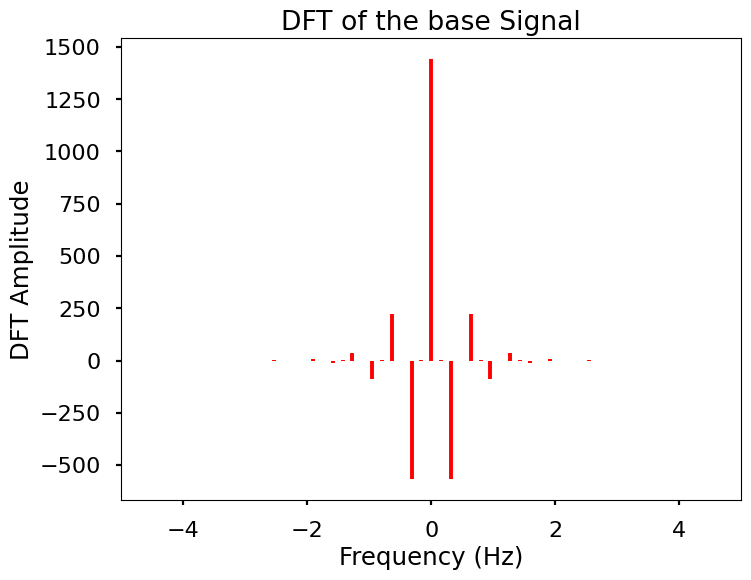

In [3]:
ft_signal = np.fft.fft(signal)
freq = np.fft.fftfreq(len(ft_signal), ts)

plt.figure(figsize = (8, 6))
plt.stem(freq, ft_signal, 'r', markerfmt=' ', basefmt= ' ')
plt.xlabel('Frequency (Hz)')
plt.ylabel('DFT Amplitude')
plt.title('DFT of the base Signal')
plt.xlim(-5, 5)

(-5.0, 5.0)

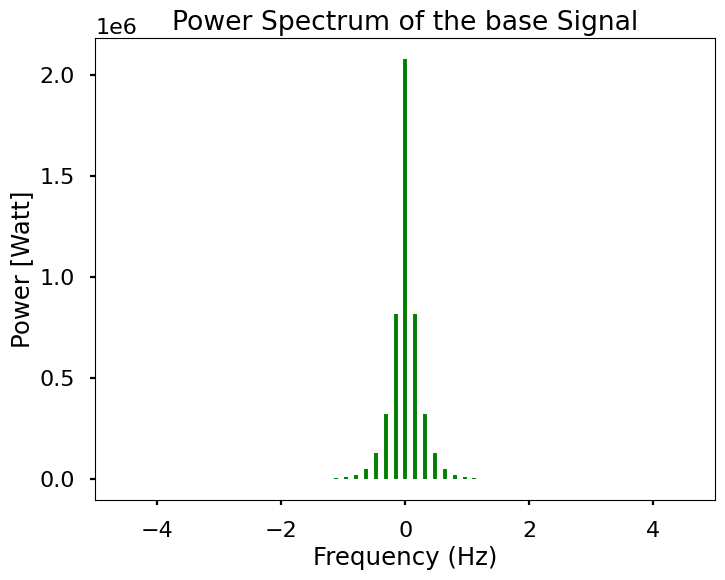

In [4]:
pwr_signal = np.abs(ft_signal)**2

plt.figure(figsize = (8, 6))
plt.stem(freq, pwr_signal, 'g', markerfmt=" ", basefmt=" ")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power [Watt]')
plt.title('Power Spectrum of the base Signal')
plt.xlim(-5,5)

(-10.0, 10.0)

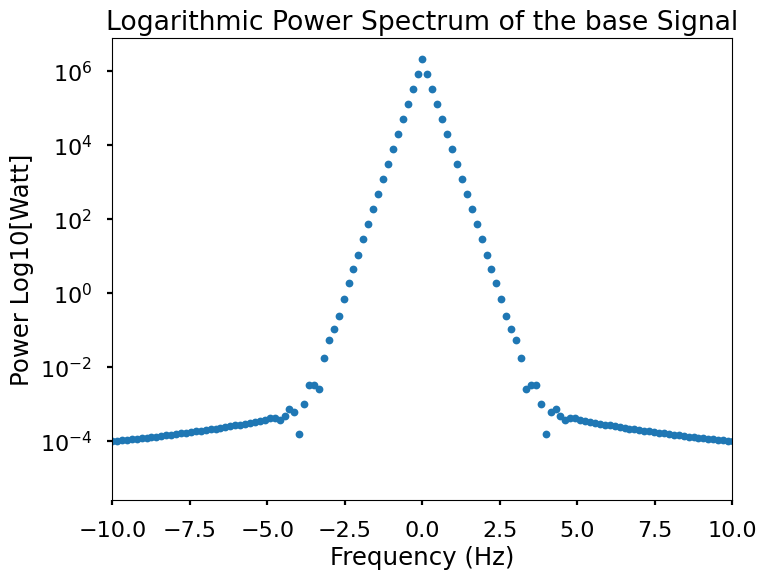

In [5]:
plt.figure(figsize = (8, 6))
plt.semilogy(freq, pwr_signal, '.')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Log10[Watt]')
plt.title('Logarithmic Power Spectrum of the base Signal')
plt.xlim(-10,10)

(-5.0, 5.0)

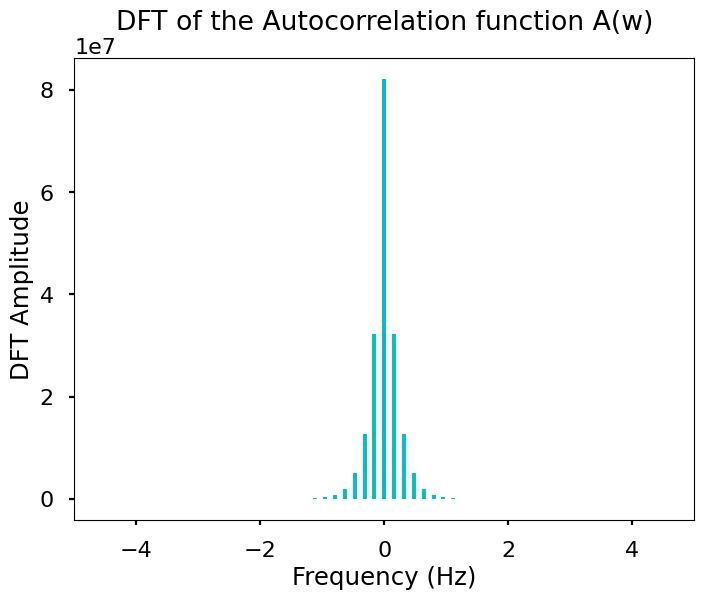

In [6]:
auto_ft_signal = np.square(2*np.pi)*pwr_signal
plt.figure(figsize = (8, 6))
plt.stem(freq, auto_ft_signal, 'c', markerfmt=' ', basefmt= ' ')
plt.xlabel('Frequency (Hz)')
plt.ylabel('DFT Amplitude')
plt.title('DFT of the Autocorrelation function A(w)')
plt.xlim(-5,5)

Text(0.5, 1.0, 'Autocorrelation Signal')

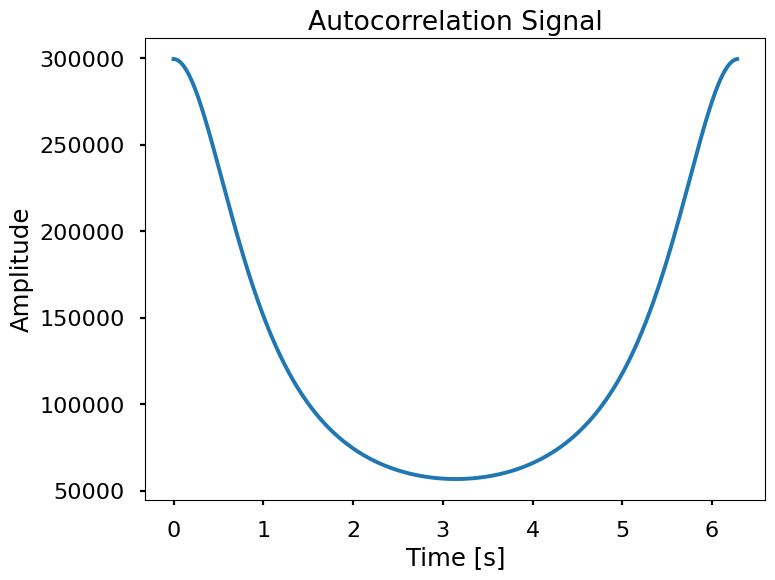

In [7]:
auto_signal = np.fft.ifft(auto_ft_signal)
plt.figure(figsize = (8, 6))
plt.plot(t, auto_signal)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Autocorrelation Signal')

Text(0.5, 1.0, 'Phased Autocorrelation Signal')

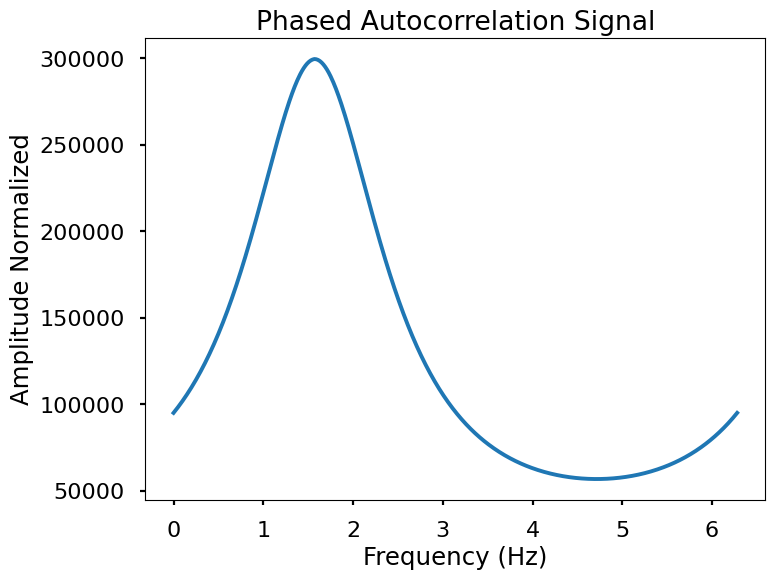

In [8]:
reodered_signal = np.concatenate([auto_signal[-len(auto_signal)//4:-1], auto_signal[:-len(auto_signal)//4+1]])
plt.figure(figsize = (8, 6))
plt.plot(t, reodered_signal)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude Normalized')
plt.title('Phased Autocorrelation Signal')

Text(0.5, 1.0, 'Normalized Phased Autocorrelation Signal')

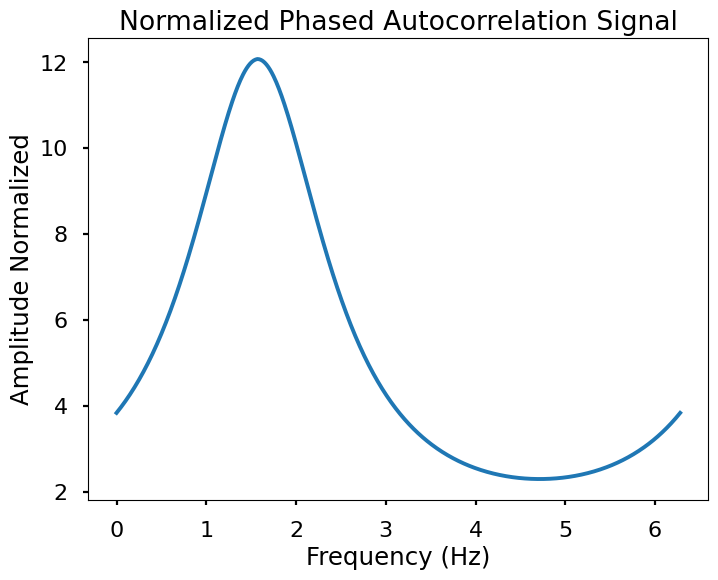

In [9]:
normalized_signal = reodered_signal/(sr*period*np.square(2*np.pi))
plt.figure(figsize = (8, 6))
plt.plot(t, normalized_signal)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude Normalized')
plt.title('Normalized Phased Autocorrelation Signal')

## Second Point

In [10]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 8})


def get_noisy_signal(original_signal, alpha):
    noisy_signal = np.zeros(len(signal))
    for i, signal_point in enumerate(original_signal):
        noisy_signal[i] += signal_point + alpha*(2*np.random.random()-1)
    return noisy_signal

alphas = [0.1, 0.5, 1, 3, 5]
noisy_signal_families = []

for alpha in alphas:
    noisy_signal = get_noisy_signal(signal, alpha)
    noisy_signal_families.append(noisy_signal)
    
    

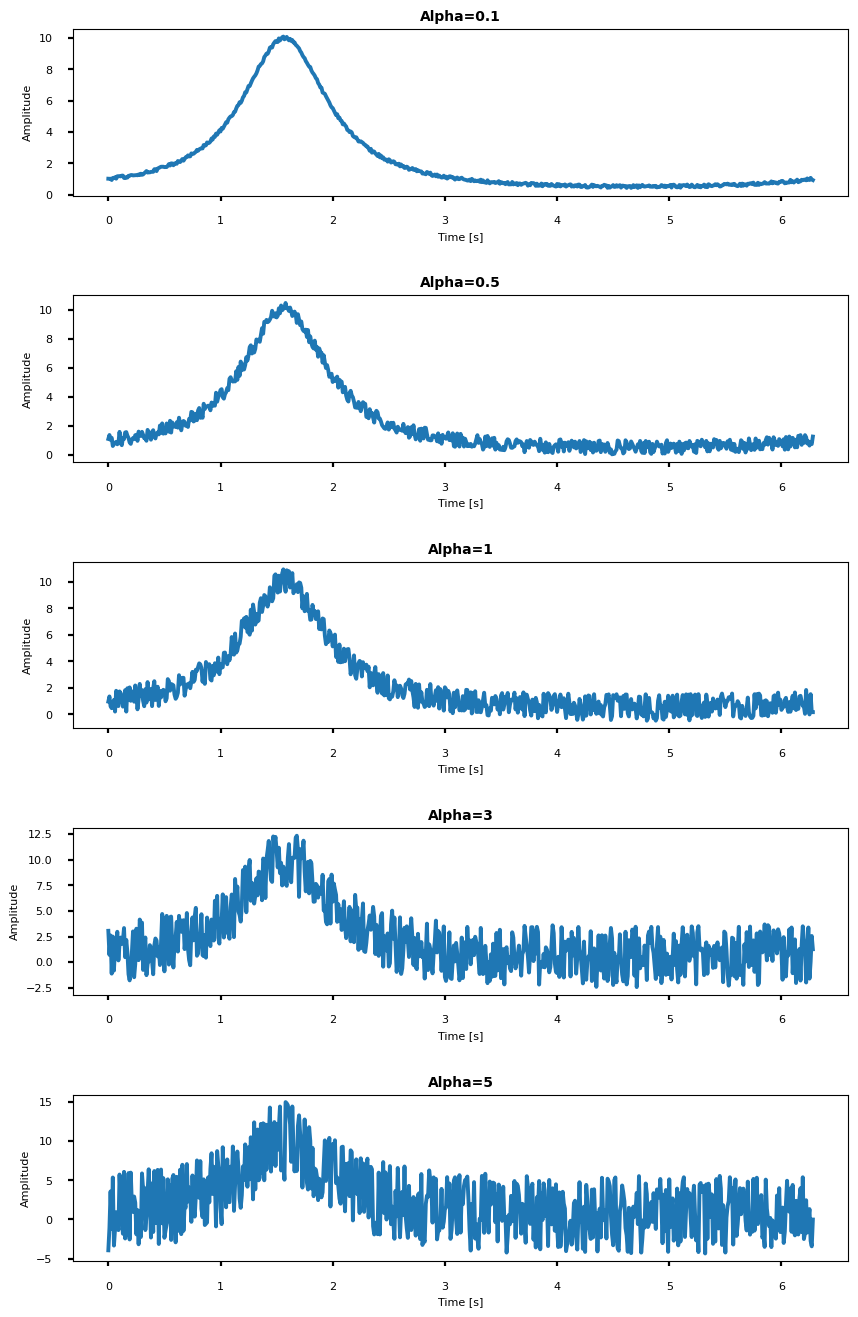

In [11]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 16), gridspec_kw={'hspace': 0.6})

for i, noisy_signal in enumerate(noisy_signal_families):
    axs[i].plot(t, noisy_signal_families[i])
    axs[i].set_title(f'Alpha={alphas[i]}', fontsize=10, fontweight= 'bold')
    axs[i].set_xlabel('Time [s]', fontsize=8)
    axs[i].set_ylabel('Amplitude', fontsize=8)

    # Set the font size of the tick labels on the x and y axes
    axs[i].tick_params(axis='both', labelsize=8)
    

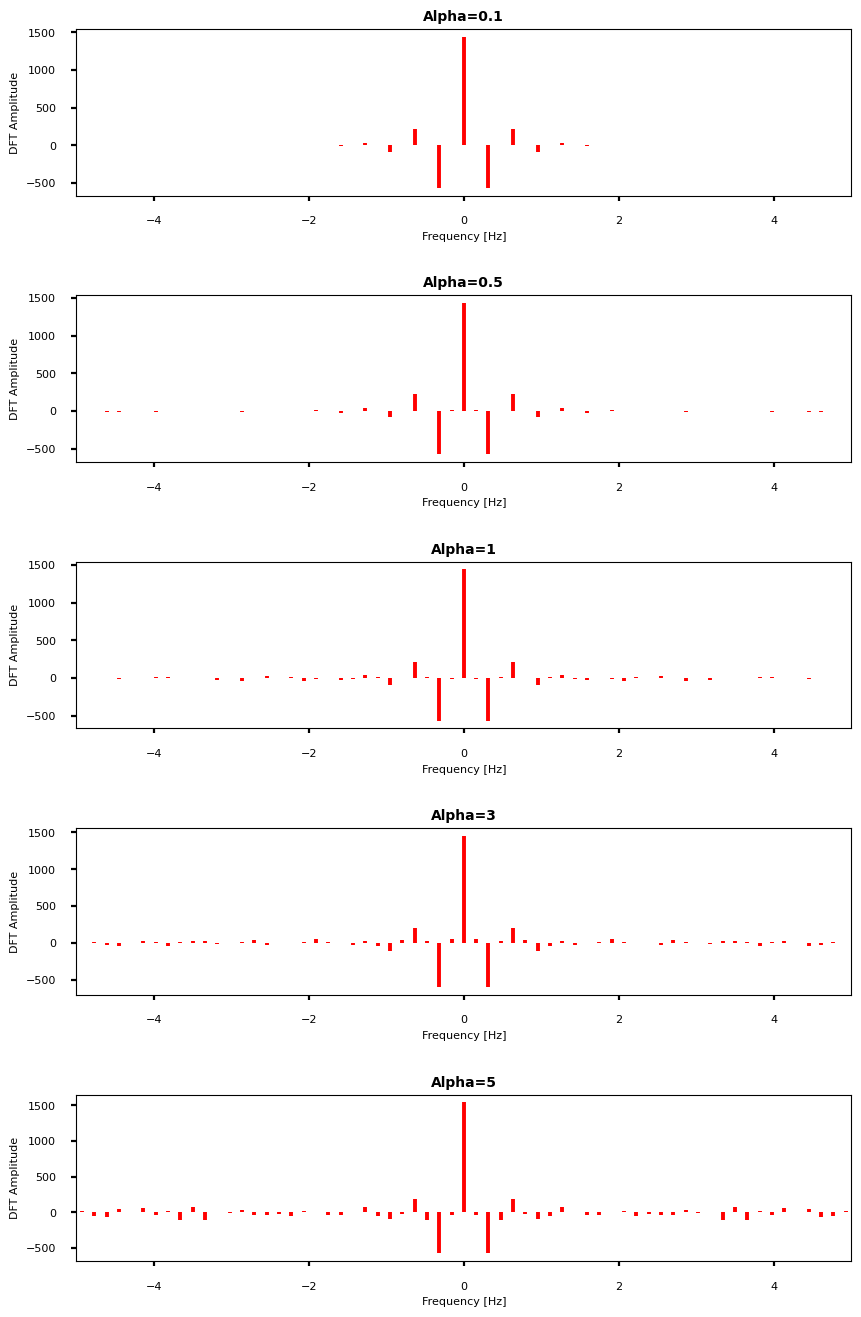

In [12]:
noisy_ft_signals = [np.fft.fft(signal) for signal in noisy_signal_families]

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 16), gridspec_kw={'hspace': 0.6})
for i, noisy_signal in enumerate(noisy_signal_families):
    axs[i].stem(freq, noisy_ft_signals[i], 'r', markerfmt=' ', basefmt= ' ')
    axs[i].set_title(f'Alpha={alphas[i]}', fontsize=10, fontweight= 'bold')
    axs[i].set_xlabel('Frequency [Hz]', fontsize=8)
    axs[i].set_ylabel('DFT Amplitude', fontsize=8)
    axs[i].set_xlim(-5, 5)

    # Set the font size of the tick labels on the x and y axes
    axs[i].tick_params(axis='both', labelsize=8)

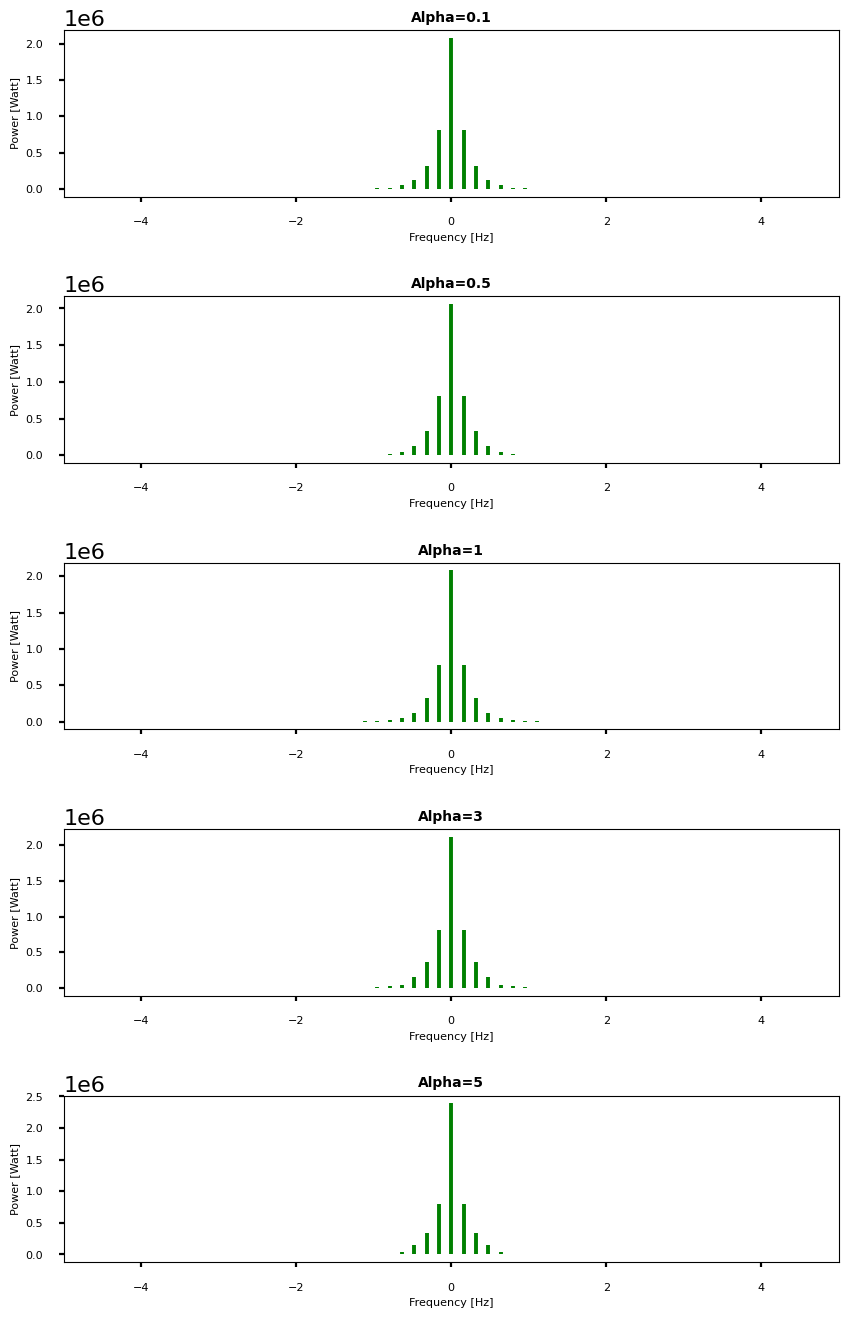

In [13]:
noisy_pwr_signals = [np.abs(signal)**2 for signal in noisy_ft_signals]

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 16), gridspec_kw={'hspace': 0.6})
for i, noisy_signal in enumerate(noisy_signal_families):
    axs[i].stem(freq, noisy_pwr_signals[i], 'g', markerfmt=' ', basefmt= ' ')
    axs[i].set_title(f'Alpha={alphas[i]}', fontsize=10, fontweight= 'bold')
    axs[i].set_xlabel('Frequency [Hz]', fontsize=8)
    axs[i].set_ylabel('Power [Watt]', fontsize=8)
    axs[i].set_xlim(-5, 5)

    # Set the font size of the tick labels on the x and y axes
    axs[i].tick_params(axis='both', labelsize=8)

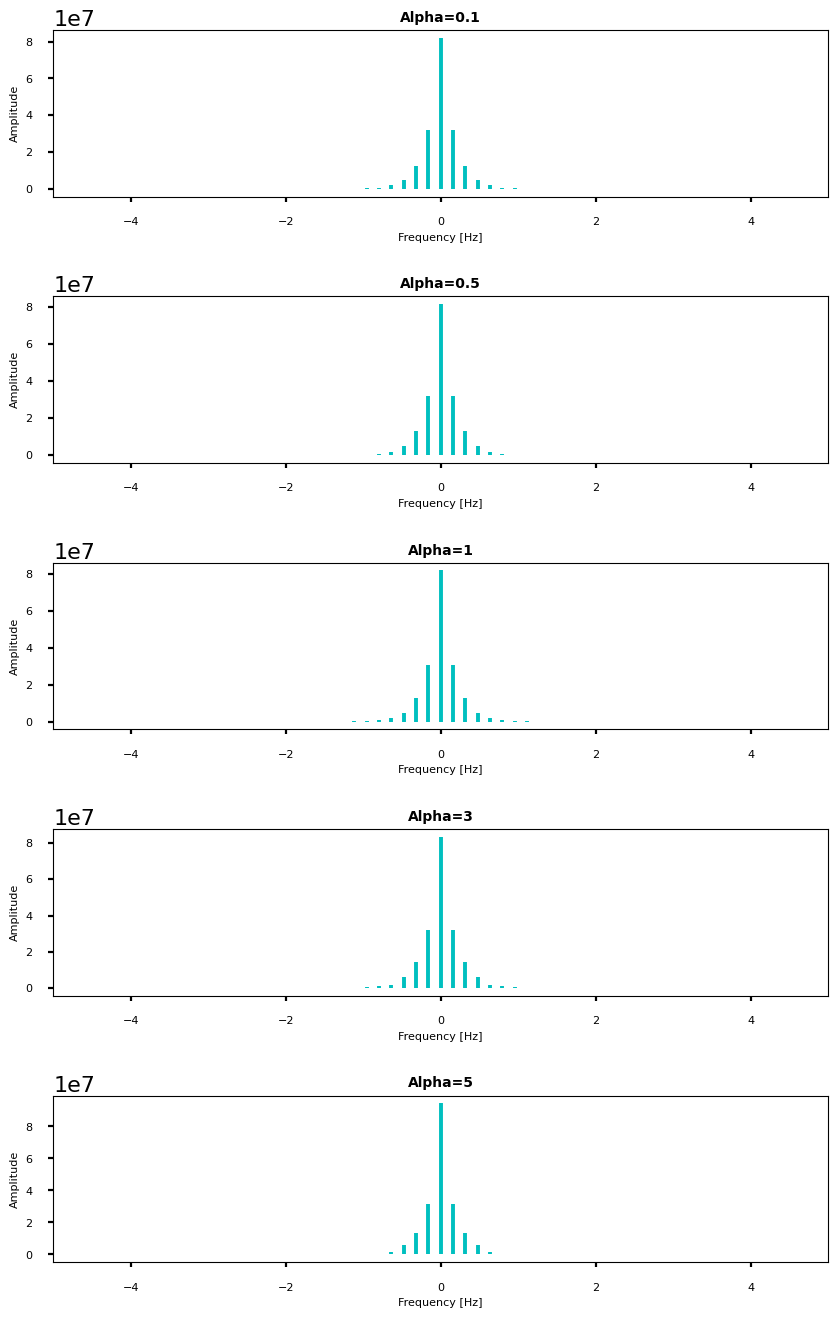

In [14]:
noisy_auto_ft_signals = [np.square(2*np.pi)*signal for signal in noisy_pwr_signals]

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 16), gridspec_kw={'hspace': 0.6})
for i, noisy_signal in enumerate(noisy_signal_families):
    axs[i].stem(freq, noisy_auto_ft_signals[i], 'c', markerfmt=' ', basefmt= ' ')
    axs[i].set_title(f'Alpha={alphas[i]}', fontsize=10, fontweight= 'bold')
    axs[i].set_xlabel('Frequency [Hz]', fontsize=8)
    axs[i].set_ylabel('Amplitude', fontsize=8)
    axs[i].set_xlim(-5, 5)

    # Set the font size of the tick labels on the x and y axes
    axs[i].tick_params(axis='both', labelsize=8)

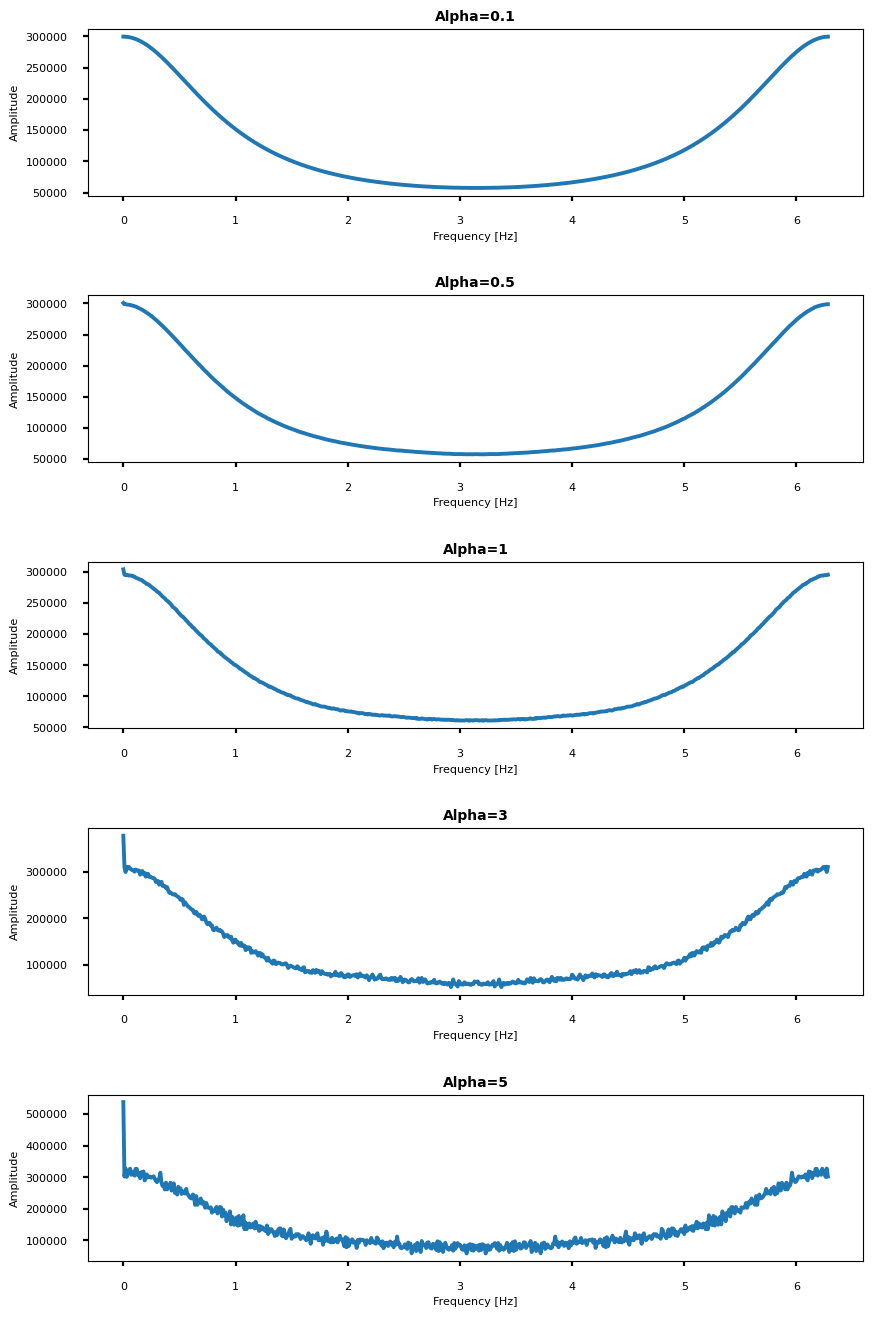

In [15]:
noisy_auto_signals = [np.fft.ifft(signal) for signal in noisy_auto_ft_signals]

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 16), gridspec_kw={'hspace': 0.6})
for i, noisy_signal in enumerate(noisy_signal_families):
    axs[i].plot(t, noisy_auto_signals[i])
    axs[i].set_title(f'Alpha={alphas[i]}', fontsize=10, fontweight= 'bold')
    axs[i].set_xlabel('Frequency [Hz]', fontsize=8)
    axs[i].set_ylabel('Amplitude', fontsize=8)

    # Set the font size of the tick labels on the x and y axes
    axs[i].tick_params(axis='both', labelsize=8)

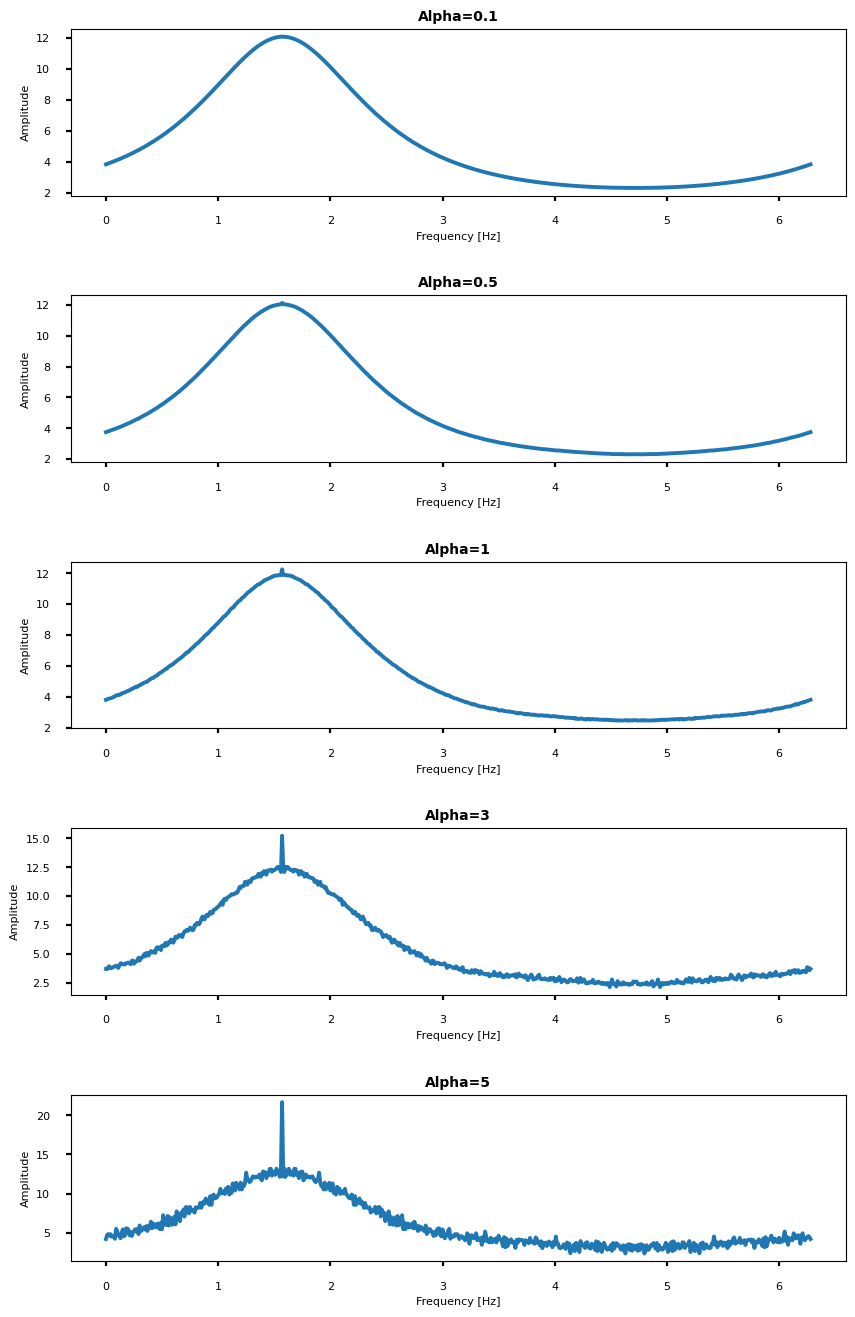

In [16]:
reodered_signals = [np.concatenate([auto_signal[-len(auto_signal)//4:-1], auto_signal[:-len(auto_signal)//4+1]]) for auto_signal in noisy_auto_signals]
normalized_signals = reodered_signals/(sr*period*np.square(2*np.pi))

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 16), gridspec_kw={'hspace': 0.6})
for i, noisy_signal in enumerate(noisy_signal_families):
    axs[i].plot(t, normalized_signals[i])
    axs[i].set_title(f'Alpha={alphas[i]}', fontsize=10, fontweight= 'bold')
    axs[i].set_xlabel('Frequency [Hz]', fontsize=8)
    axs[i].set_ylabel('Amplitude', fontsize=8)

    # Set the font size of the tick labels on the x and y axes
    axs[i].tick_params(axis='both', labelsize=8)